## Car Price Prediction
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

### Steps followed:
1. **Loading the dataset**
2. **Exploratort Data Analysis**
3. **Dealing with Outliers**
4. **Predictive Modelling**
5. **Comparing Metrics**

In [27]:
# IMPORTING REQUIRED LIBRARIES FOR EXPLORATORY DATA ANALYSIS AND MACHINE LEARNING
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
df = pd.read_csv('car data.csv')

In [29]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**Getting Statistical Information of dataset**

In [30]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Getting number of unique values in each column**

In [32]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

### Checking for Outliers in each column

<AxesSubplot:>

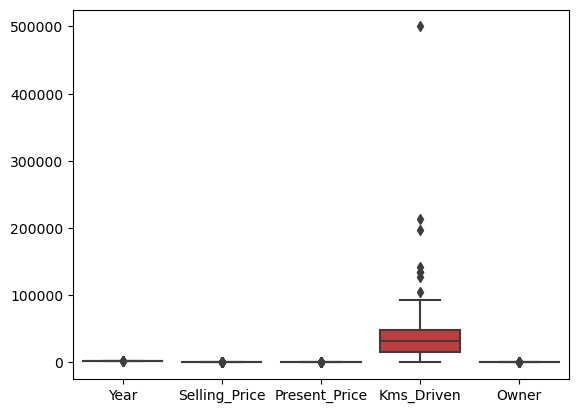

In [33]:
sns.boxplot(data=df)

In [34]:
px.box(data_frame=df,x='Kms_Driven',title='Boxplot of Kms_Driven Column')

**Inference:**
* There are some outliers in Kms_driven column.

### Removing Outliers using Inter-Quartile Range
* *Creating a function which finds Q1(25th Percentile) and Q3(75th Percentile) and gets InterQuartile(Q3-Q1 Range)* 
* *After finding IQR,We can say that those whose value is below than Q1 - 1.5 * IQR and above than 
   Q3 + 1.5 * IQR are outliers*

In [35]:
# General function that returns outliers in a dataframe
def find_outliers(df):
    percentile_25 = df.quantile(0.25)
    percentile_75 = df.quantile(0.75)
    IQR = percentile_75 - percentile_25
    lower_limit = percentile_25 - 1.5 * IQR
    upper_limit = percentile_75 + 1.5 * IQR
    outliers = df[(df < lower_limit) | (df > upper_limit)]
    return outliers

In [36]:
find_outliers(df['Kms_Driven'])

37     127000
50     104707
53     135000
77     135154
84     197176
85     142000
179    213000
196    500000
Name: Kms_Driven, dtype: int64

In [37]:
# STORING INDICES OF RECORDS WHERE Kms_Driven COLUMN HAVE OUTLIERS
outliers_index = find_outliers(df['Kms_Driven']).index
outliers_index

Int64Index([37, 50, 53, 77, 84, 85, 179, 196], dtype='int64')

In [38]:
# DROPPING THOSE RECORDS WHERE INDEX IS EQUAL TO OUTLIERS INDEX
df.drop(index=outliers_index,inplace=True)

In [39]:
df.shape

(293, 9)

In [40]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Countplots of Categorical Features

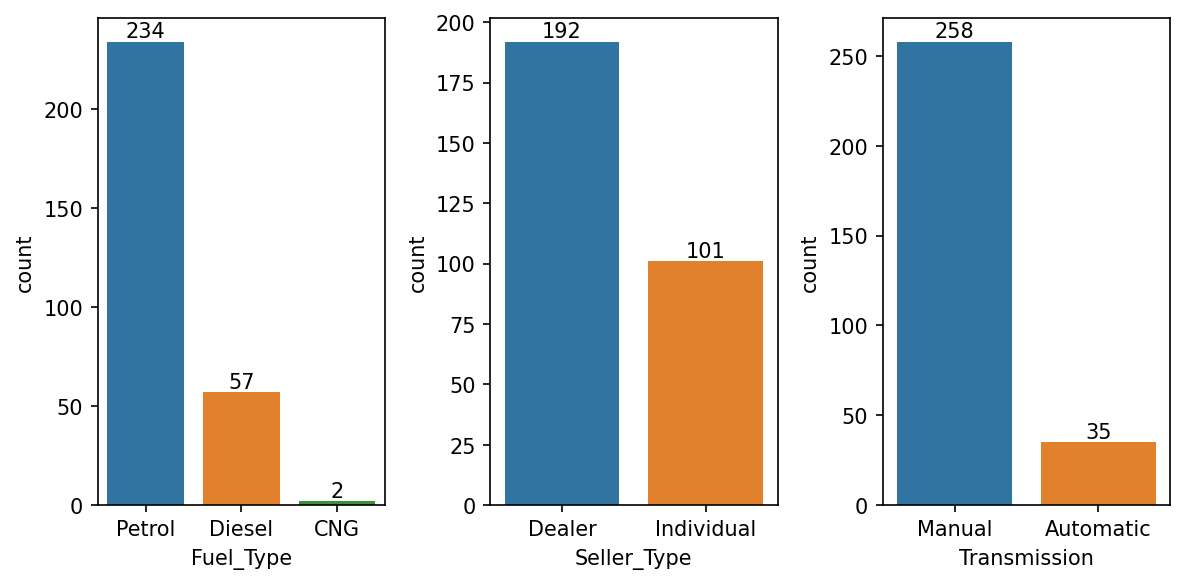

In [41]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(8,4),dpi=150)

fuel_type_plot = sns.countplot(data=df,x='Fuel_Type',ax=ax[0])
for i in fuel_type_plot.containers:
    fuel_type_plot.bar_label(i,)
    
seller_type_plot = sns.countplot(data=df,x='Seller_Type',ax=ax[1])
for i in seller_type_plot.containers:
    seller_type_plot.bar_label(i,)
    
transmission_plot = sns.countplot(data=df,x='Transmission',ax=ax[2])
for i in transmission_plot.containers:
    transmission_plot.bar_label(i,)    
    
plt.tight_layout()    

### Getiing Dummy Variables for Categorical Features

In [42]:
dummy_df = pd.get_dummies(data=df,drop_first=True)
dummy_df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
299,2017,11.50,12.50,9000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


**Getting top 20 positively correlated features with Target column**

In [43]:
dummy_df.corr()['Selling_Price'].sort_values(ascending=False)[:20]

Selling_Price             1.000000
Present_Price             0.886687
Fuel_Type_Diesel          0.542272
Car_Name_fortuner         0.520950
Car_Name_land cruiser     0.352330
Car_Name_innova           0.308609
Year                      0.232258
Car_Name_city             0.171159
Car_Name_creta            0.144189
Kms_Driven                0.122652
Car_Name_corolla altis    0.120564
Car_Name_elantra          0.114237
Car_Name_ciaz             0.099512
Car_Name_verna            0.064583
Car_Name_ertiga           0.060825
Car_Name_vitara brezza    0.053354
Car_Name_jazz             0.036436
Car_Name_s cross          0.021425
Car_Name_baleno           0.013878
Car_Name_grand i10        0.009608
Name: Selling_Price, dtype: float64

**Getting top 20 negatively correlated features with Target column**

In [44]:
dummy_df.corr()['Selling_Price'].sort_values(ascending=True)[:20]

Seller_Type_Individual               -0.565819
Fuel_Type_Petrol                     -0.530025
Transmission_Manual                  -0.373345
Car_Name_Royal Enfield Classic 350   -0.108962
Car_Name_Bajaj Pulsar 150            -0.101646
Owner                                -0.100128
Car_Name_Bajaj Pulsar NS 200         -0.084176
Car_Name_TVS Apache RTR 160          -0.082697
Car_Name_Yamaha FZ S V 2.0           -0.081755
Car_Name_Royal Enfield Thunder 350   -0.081514
Car_Name_Honda CB Hornet 160R        -0.079468
Car_Name_Bajaj Avenger 220           -0.077988
Car_Name_Bajaj Discover 125          -0.073683
Car_Name_Honda CB twister            -0.073190
Car_Name_Honda CB Shine              -0.073107
Car_Name_Hero Splender iSmart        -0.069571
Car_Name_Hero Passion Pro            -0.069571
Car_Name_Honda Activa 4G             -0.068913
Car_Name_TVS Apache RTR 180          -0.068749
Car_Name_Bajaj Pulsar 220 F          -0.068091
Name: Selling_Price, dtype: float64

### Predictive Modelling

### Splitting data into Train,Test

In [45]:
X = dummy_df.drop('Selling_Price',axis=1)
y = dummy_df['Selling_Price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

In [47]:
print('X_train Shape : ',X_train.shape)
print('X_test Shape : ',X_test.shape)
print('y_train Shape : ',y_train.shape)
print('y_test Shape : ',y_test.shape)

X_train Shape :  (219, 102)
X_test Shape :  (74, 102)
y_train Shape :  (219,)
y_test Shape :  (74,)


In [48]:
# GREATING INSTANCES OF MODELS
linear_model = LinearRegression()
svm_model = SVR()
rf_model = RandomForestRegressor()

In [49]:
# FITTING THE MODELS WITH TRAIN DATA
linear_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
models_list = [linear_model,svm_model,rf_model]
mae_list = []
rmse_list = []

for model in models_list:
    model_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,model_pred)
    rmse = np.sqrt(mean_squared_error(y_test,model_pred))
    mae_list.append(mae)
    rmse_list.append(rmse)

In [51]:
pd.DataFrame({'Model':['linear_model','SVM Model','Random Forest'],
             'Mean Absolute Error':mae_list,
             'Root Mean Squared Error':rmse_list},index=range(1,len(models_list)+1))

,Model,Mean Absolute Error,Root Mean Squared Error
1,linear_model,1.261922,1.818882
2,SVM Model,2.709330,4.272006
3,Random Forest,0.766062,1.628287


### Inference : 
**Random Forest Regressor is performing better than other models.Mean Absolute Error,Root Mean Squared Error are less for that model.**